In [1]:
library(ggplot2)
library(factoextra)
library(psych)
library(cluster)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [2]:
df <- read.csv('CLV.csv', stringsAsFactors=TRUE)
head(df)

,Customer,State,Customer.Lifetime.Value,Response,Coverage,Education,Effective.To.Date,EmploymentStatus,Gender,Income,⋯,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,BU79786,Washington,2763.519,No,Basic,Bachelor,2/24/11,Employed,F,56274,⋯,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.8111,Two-Door Car,Medsize
2,QZ44356,Arizona,6979.536,No,Extended,Bachelor,1/31/11,Unemployed,F,0,⋯,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.4649,Four-Door Car,Medsize
3,AI49188,Nevada,12887.432,No,Premium,Bachelor,2/19/11,Employed,F,48767,⋯,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.4722,Two-Door Car,Medsize
4,WW63253,California,7645.862,No,Basic,Bachelor,1/20/11,Unemployed,M,0,⋯,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.8813,SUV,Medsize
5,HB64268,Washington,2813.693,No,Basic,Bachelor,2/3/11,Employed,M,43836,⋯,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1309,Four-Door Car,Medsize
6,OC83172,Oregon,8256.298,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,⋯,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.3830,Two-Door Car,Medsize


In [3]:
str(df)

'data.frame':	9134 obs. of  24 variables:
 $ Customer                     : Factor w/ 9134 levels "AA10041","AA11235",..: 601 5947 97 8017 2489 4948 8434 756 1352 548 ...
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 5 1 3 2 5 4 4 1 4 4 ...
 $ Customer.Lifetime.Value      : num  2764 6980 12887 7646 2814 ...
 $ Response                     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 2 3 1 1 1 1 3 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 2 5 1 2 ...
 $ Effective.To.Date            : Factor w/ 59 levels "1/1/11","1/10/11",..: 48 25 42 13 53 18 48 10 19 40 ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 2 5 2 5 2 2 2 5 3 2 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 1 1 1 2 2 1 1 2 2 1 ...
 $ Income                       : int  56274 0 48767 0 43836 6290

# Data Cleaning

In [4]:
colSums(is.na(df))

Customer                         State 
                            0                             0 
      Customer.Lifetime.Value                      Response 
                            0                             0 
                     Coverage                     Education 
                            0                             0 
            Effective.To.Date              EmploymentStatus 
                            0                             0 
                       Gender                        Income 
                            0                             0 
                Location.Code                Marital.Status 
                            0                             0 
         Monthly.Premium.Auto       Months.Since.Last.Claim 
                            0                             0 
Months.Since.Policy.Inception     Number.of.Open.Complaints 
                            0                             0 
           Number.of.Policies                   Policy.Type 
                            0                             0 
                       Policy              Renew.Offer.Type 
                            0                             0 
                Sales.Channel            Total.Claim.Amount 
                            0                             0 
                Vehicle.Class                  Vehicle.Size 
                            0                             0

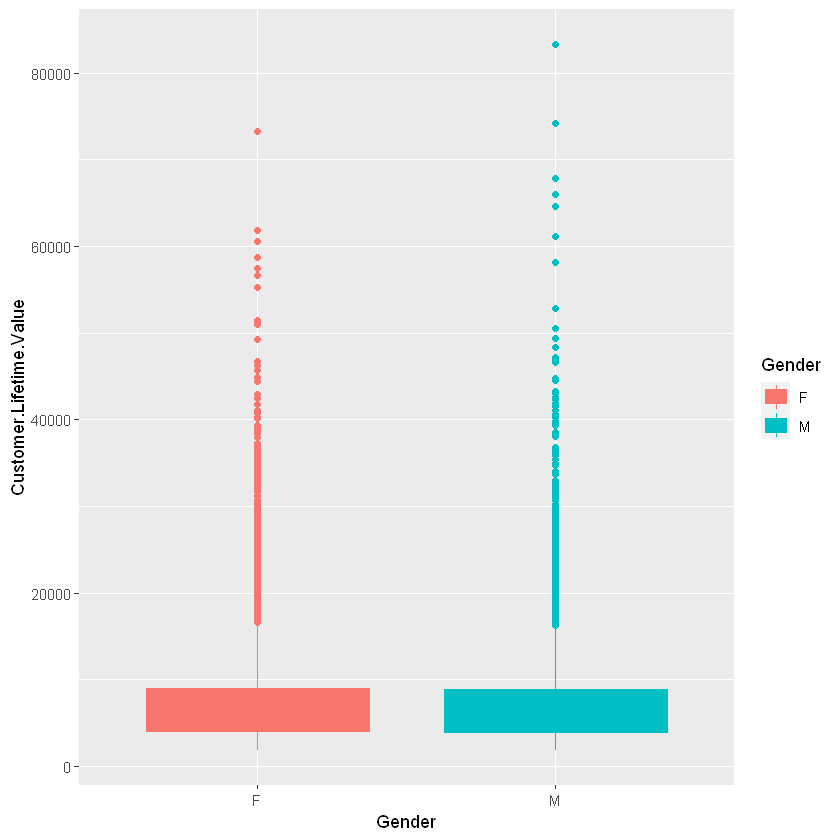

In [5]:
ggplot(data=df, aes(x=Gender, y=Customer.Lifetime.Value, fill=Gender, color=Gender))+geom_boxplot()

In [6]:
library(datetime)
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [7]:
df$Effective.To.Date = as.Date(parse_date_time(df$Effective.To.Date, order="mdy"))

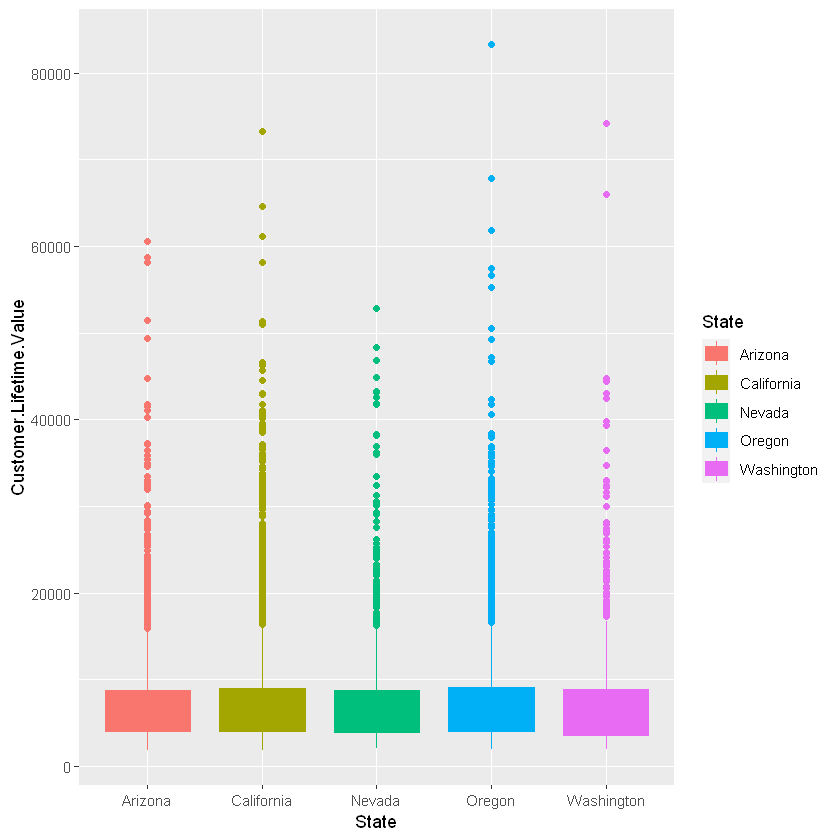

In [8]:
ggplot(data=df, aes(x=State, y= Customer.Lifetime.Value, fill=State, color=State))+geom_boxplot()

`geom_smooth()` using formula 'y ~ x'



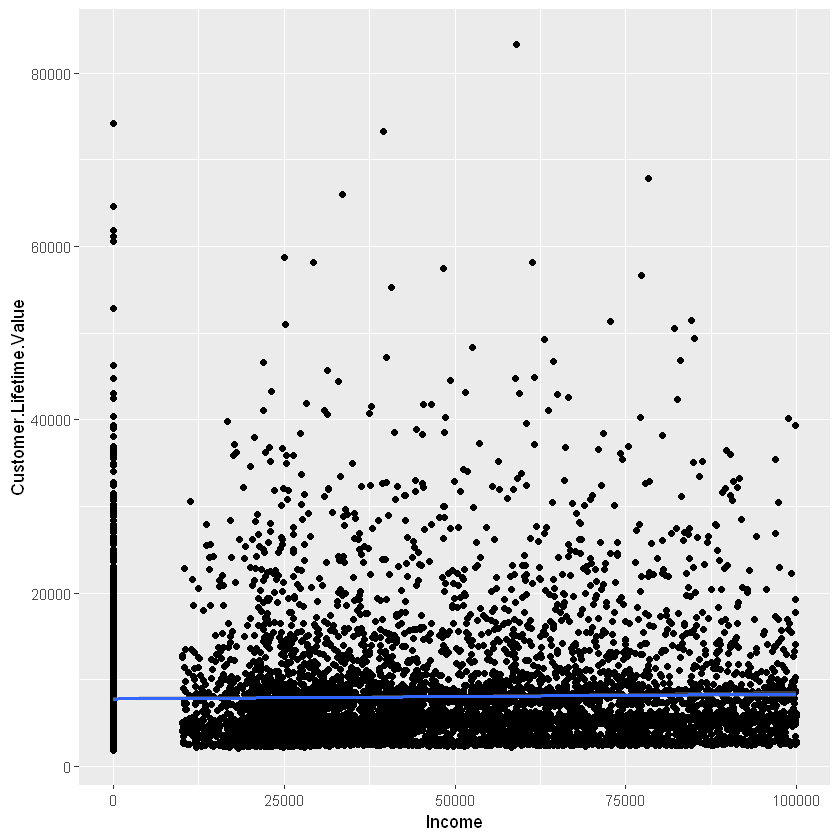

In [9]:
ggplot(data=df, aes(x=Income, y= Customer.Lifetime.Value))+geom_point()+geom_smooth(method='lm')

`geom_smooth()` using formula 'y ~ x'



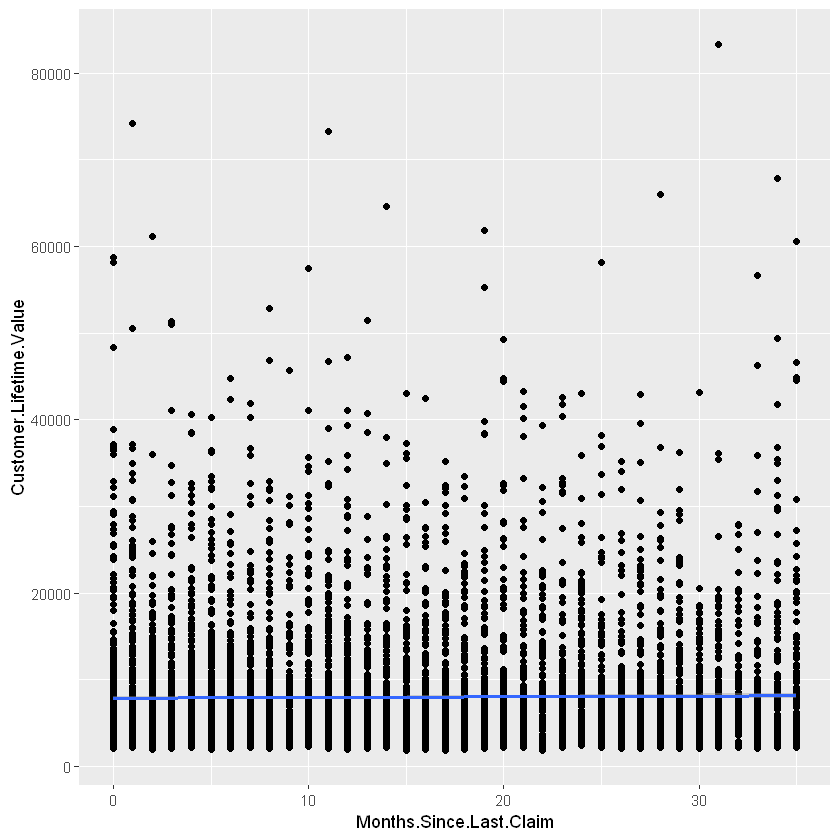

In [10]:
ggplot(data=df, aes(x=Months.Since.Last.Claim, y= Customer.Lifetime.Value))+geom_point()+geom_smooth(method='lm')

`geom_smooth()` using formula 'y ~ x'



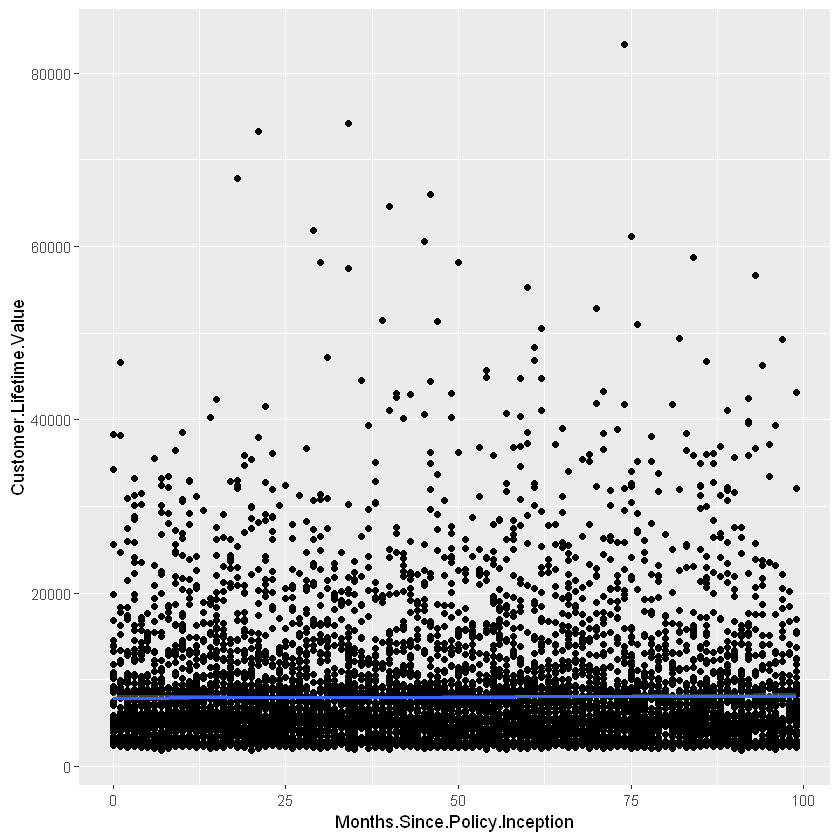

In [11]:
ggplot(data=df, aes(x=Months.Since.Policy.Inception, y= Customer.Lifetime.Value))+geom_point()+geom_smooth(method='lm')

In [15]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [16]:
numr = select(df, c(Customer.Lifetime.Value,Total.Claim.Amount,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies))

In [17]:
str(numr)

'data.frame':	9134 obs. of  8 variables:
 $ Customer.Lifetime.Value      : num  2764 6980 12887 7646 2814 ...
 $ Total.Claim.Amount           : num  385 1131 566 530 138 ...
 $ Income                       : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ Monthly.Premium.Auto         : int  69 94 108 106 73 69 67 101 71 93 ...
 $ Months.Since.Last.Claim      : int  32 13 18 18 12 14 0 0 13 17 ...
 $ Months.Since.Policy.Inception: int  5 42 38 65 44 94 13 68 3 7 ...
 $ Number.of.Open.Complaints    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Number.of.Policies           : int  1 8 2 7 1 2 9 4 2 8 ...


In [19]:
crp = cor(numr)

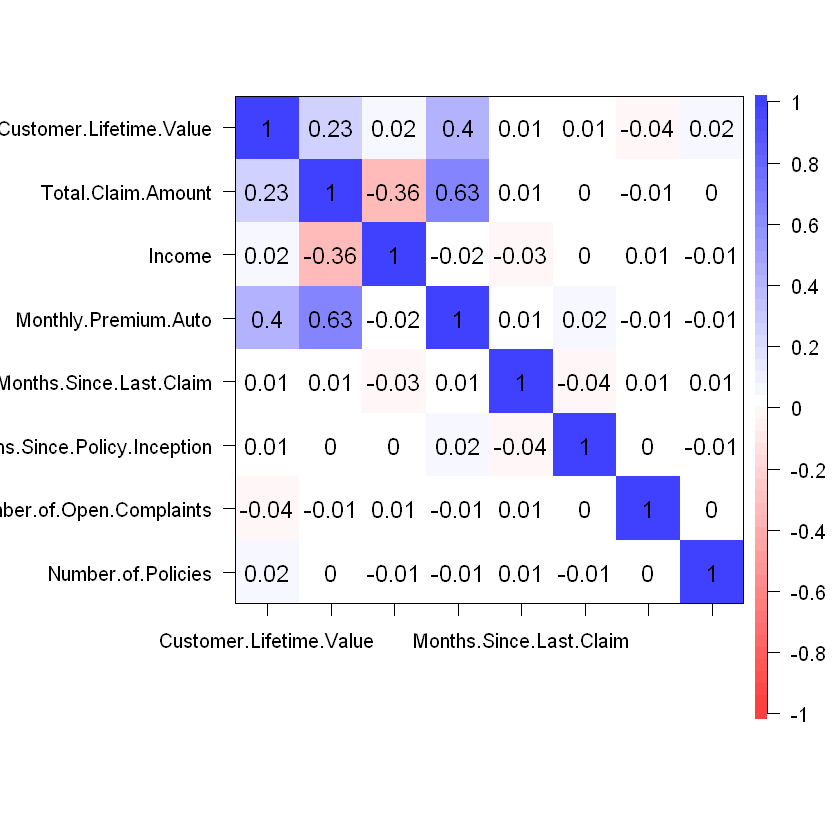

In [20]:
cor.plot(crp, number=TRUE)

`geom_smooth()` using formula 'y ~ x'



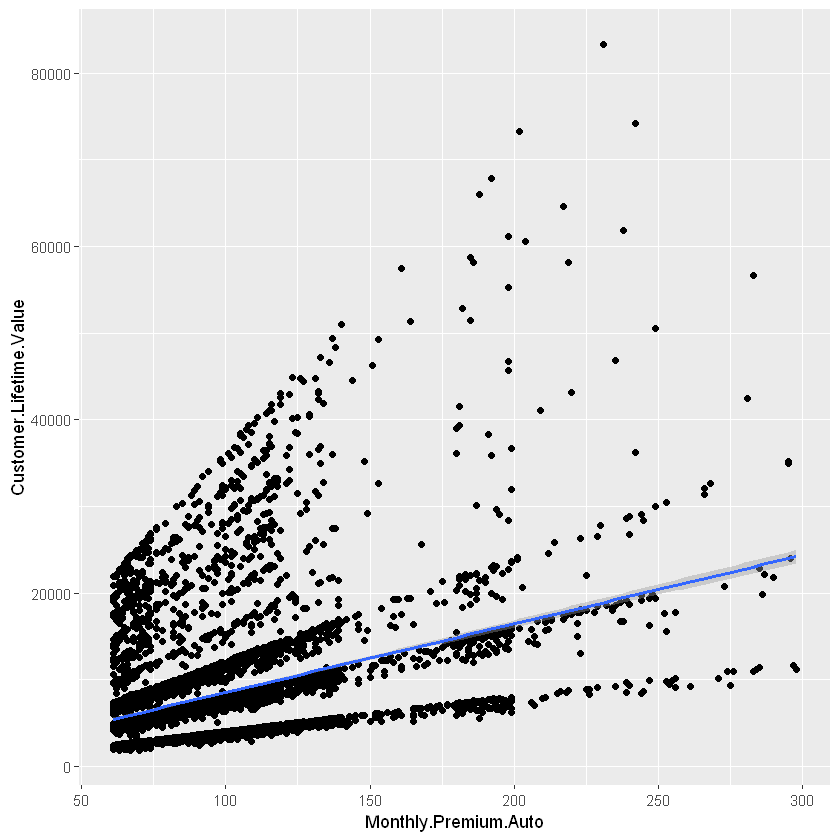

In [21]:
ggplot(data=df, aes(x=Monthly.Premium.Auto, y= Customer.Lifetime.Value))+geom_point()+geom_smooth(method='lm')

In [22]:
str(df)

'data.frame':	9134 obs. of  24 variables:
 $ Customer                     : Factor w/ 9134 levels "AA10041","AA11235",..: 601 5947 97 8017 2489 4948 8434 756 1352 548 ...
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 5 1 3 2 5 4 4 1 4 4 ...
 $ Customer.Lifetime.Value      : num  2764 6980 12887 7646 2814 ...
 $ Response                     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 2 3 1 1 1 1 3 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 2 5 1 2 ...
 $ Effective.To.Date            : Date, format: "2011-02-24" "2011-01-31" ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 2 5 2 5 2 2 2 5 3 2 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 1 1 1 2 2 1 1 2 2 1 ...
 $ Income                       : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ Loca

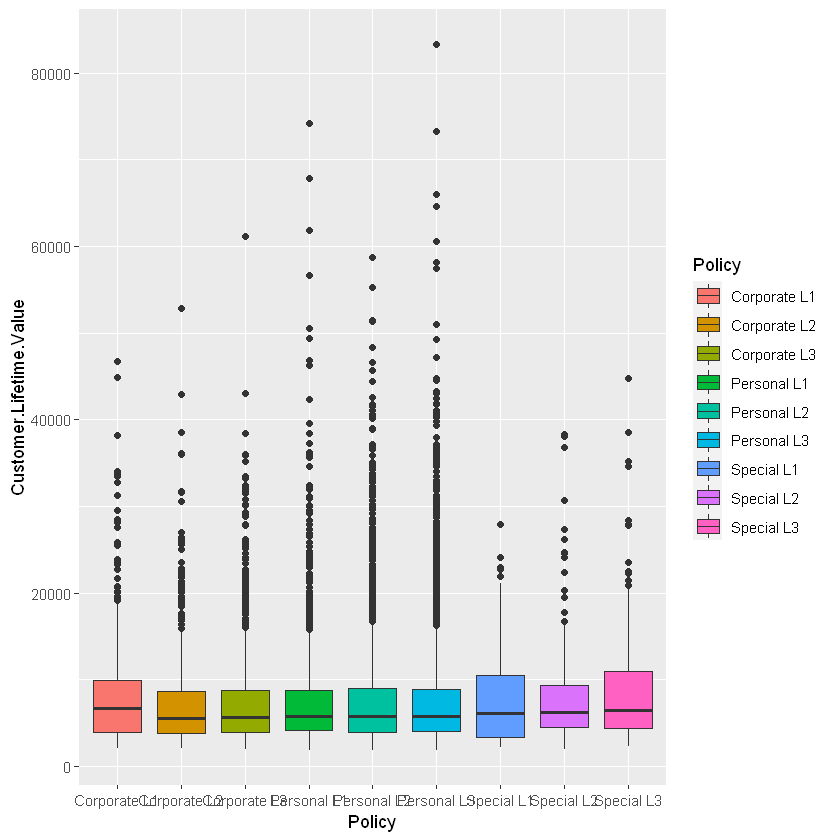

In [24]:
ggplot(data=df, aes(x=Policy, y= Customer.Lifetime.Value, fill=Policy))+geom_boxplot()

In [28]:
numr = select(df, c(Policy, Customer.Lifetime.Value,Total.Claim.Amount,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies))

In [37]:
numr = filter(df, Policy=="Corporate L2")

`geom_smooth()` using formula 'y ~ x'



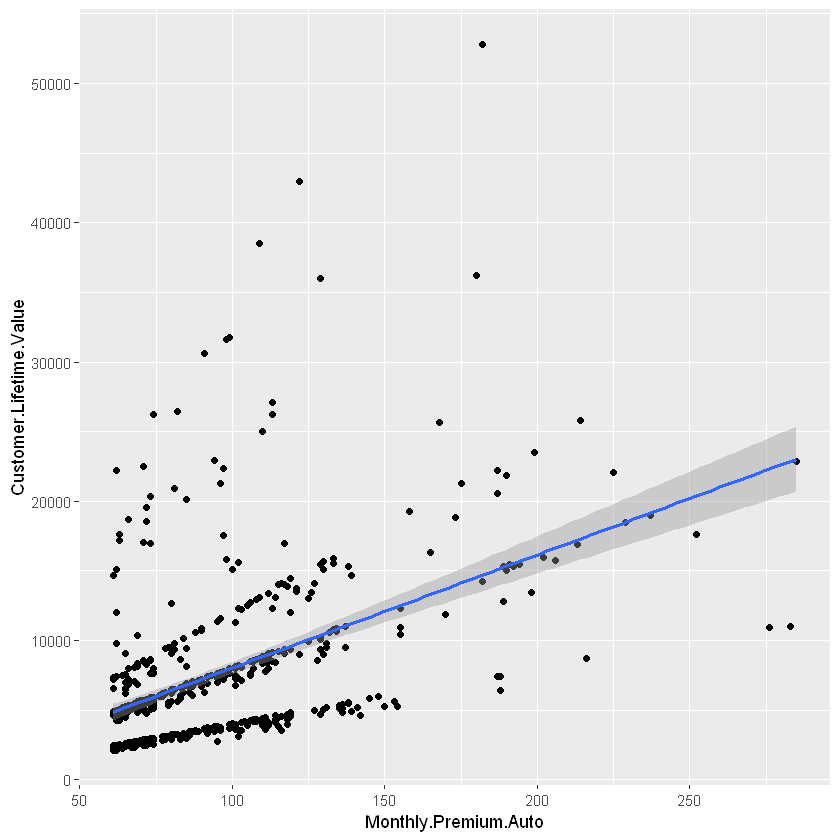

In [38]:
ggplot(data=numr, aes(x=Monthly.Premium.Auto, y= Customer.Lifetime.Value))+geom_point()+geom_smooth(method='lm')

In [40]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:psych':

    outlier


The following object is masked from 'package:ggplot2':

    margin




In [45]:
dt <- select(df, -c(Customer))

In [46]:
model <- randomForest(formula = Customer.Lifetime.Value~., data = dt, mtry = 3, importance = TRUE, na.action = na.omit)

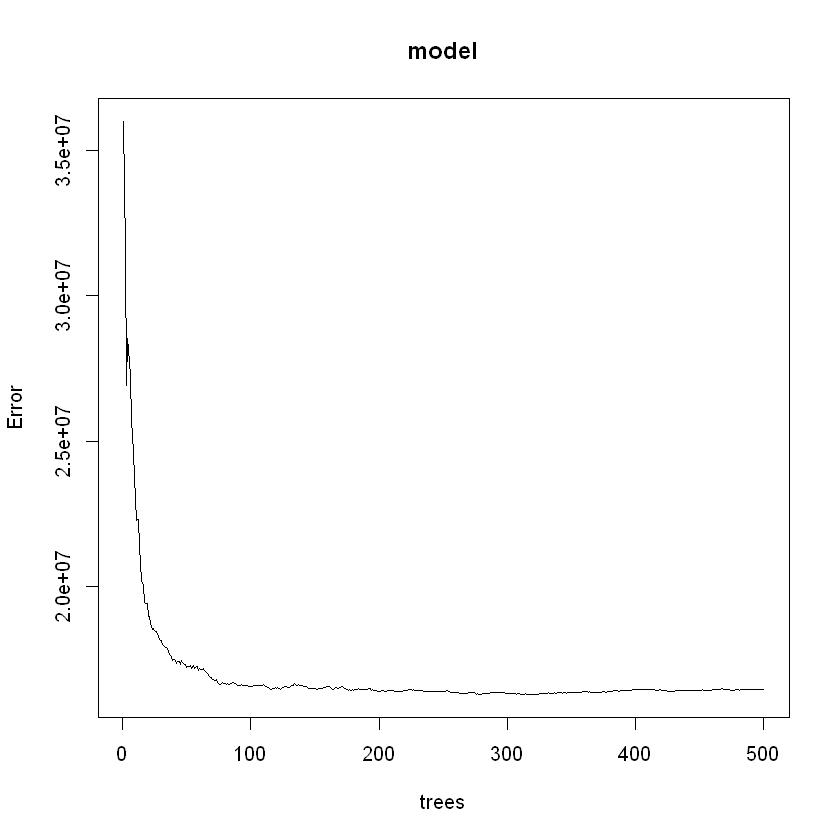

In [47]:
plot(model)

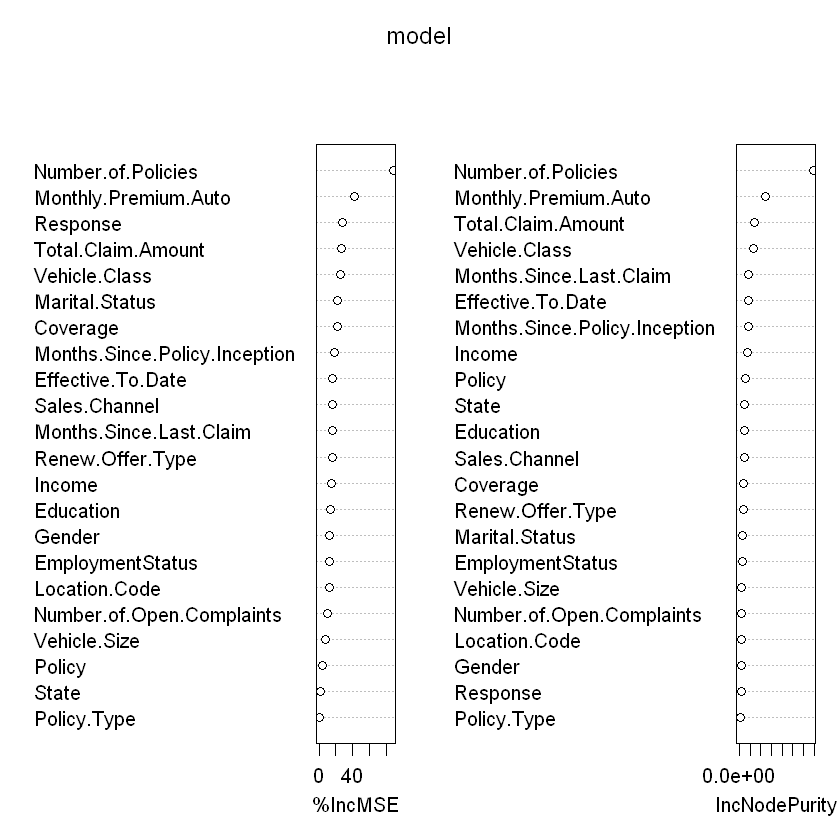

In [50]:
varImpPlot(model)

In [51]:
importance(model)

,%IncMSE,IncNodePurity
State,2.0260771,9763653485
Response,28.0813209,3063120332
Coverage,21.3079020,8427097815
Education,13.4435454,8916204285
Effective.To.Date,16.2828645,16556415915
EmploymentStatus,12.1361316,5694928040
Gender,12.6611760,3203618131
Income,14.2968892,15636249073
Location.Code,12.0773071,4087687981
Marital.Status,21.5208943,6072455799


In [53]:
model


Call:
 randomForest(formula = Customer.Lifetime.Value ~ ., data = dt,      mtry = 3, importance = TRUE, na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 16453050
                    % Var explained: 65.15